In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [12]:
file = "../../../../../../dataframes/enoe/SDEMT/df_09_transform.csv"


In [13]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

est,t_loc,sex,eda,nac_dia,nac_mes,nac_anio,l_nac_c,cs_p13_1,cs_p13_2,⋯,ing_x_hrs,cp_anoc,imssissste,p14apoyos,scian,emp_ppal,tue_ppal,mh_fil2,mh_col,sec_ins
0.9855072,0.8405797,0.5362319,0.6983141,0.1159420,0.8405797,0.1594203,0.8985507,0.9275362,0.826087,⋯,0.4181089,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.8695652,0.8405797,0.5362319,0.6799321,0.1159420,0.2173913,0.1014493,0.8985507,0.9275362,0.826087,⋯,0.5097726,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.9855072,0.8405797,0.5362319,0.5769558,0.1159420,0.2173913,0.5942029,0.8985507,0.8115942,0.826087,⋯,0.4350734,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.8695652,0.9275362,0.5362319,0.5786007,0.9710145,0.6231884,0.2028986,0.8985507,0.8115942,0.826087,⋯,0.4714502,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.8695652,0.8405797,0.5362319,0.6431648,0.2898551,0.2173913,0.4202899,0.8985507,0.9855072,0.826087,⋯,0.2361188,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.9855072,0.8405797,0.5362319,0.7319174,0.2173913,0.2173913,0.7391304,0.8985507,0.9275362,0.826087,⋯,0.2639982,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029


In [14]:
ncol(data)

[1] 51

In [15]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [16]:
max(dunn_kmeans)

[1] 0.3872047

Saving 7 x 7 in image


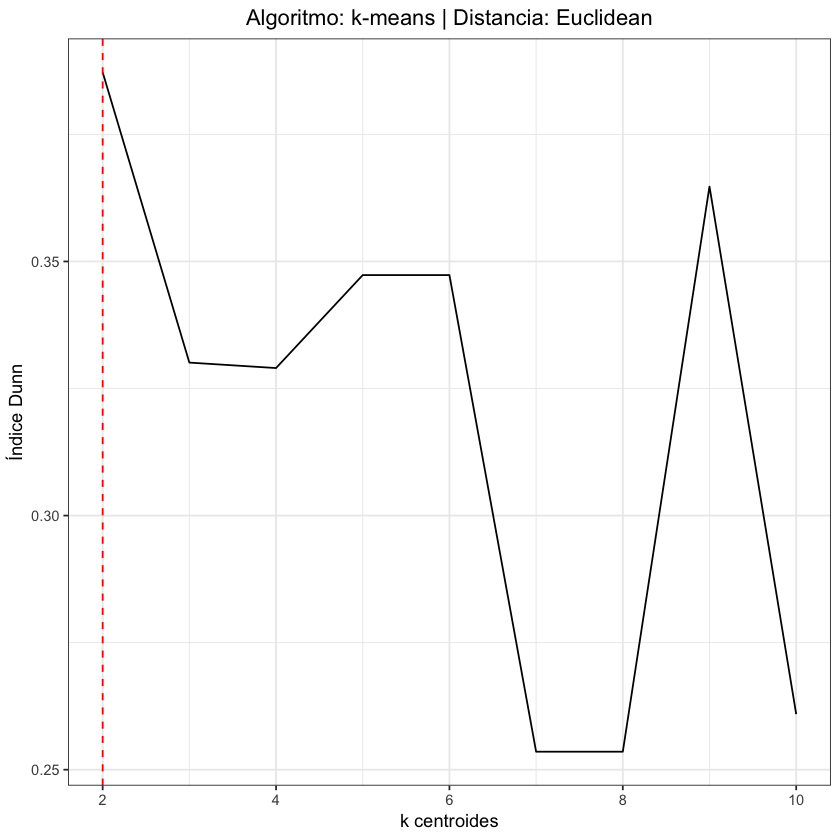

In [17]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Distancia: Euclidean', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enigh/HOGARES/dunn_euclidean_transform.png", dpi = 300)
    

In [18]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


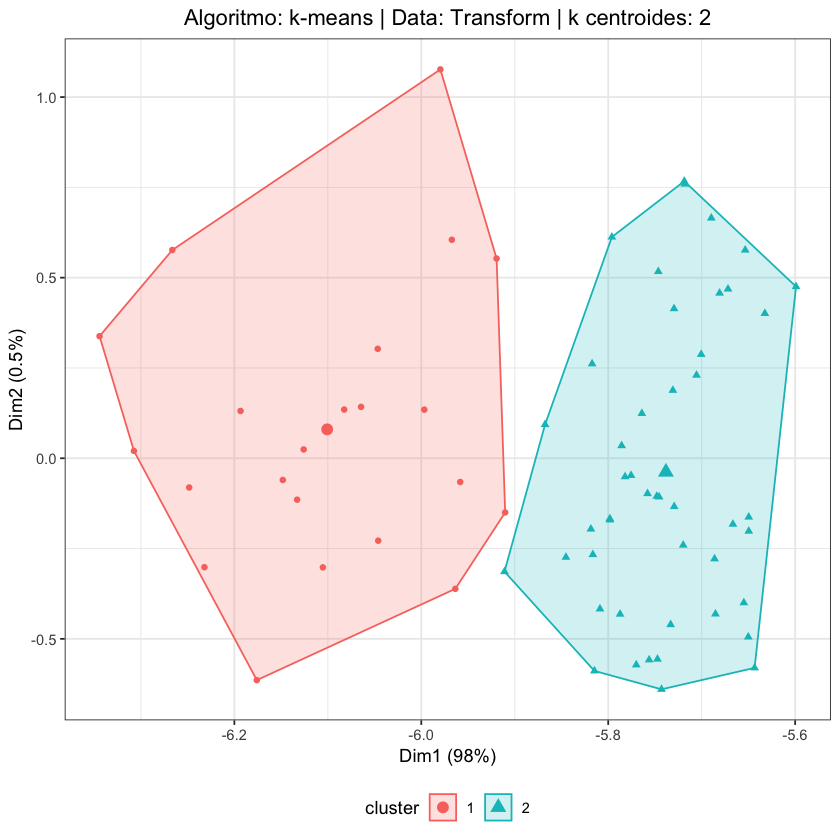

In [19]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Data: Transform | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/enoe/SDEMT/kmeans_euclidean_transform.png", 
       dpi = 300)

In [20]:
dunn_kmeans

[1] 0.3872047 0.3301024 0.3290274 0.3473204 0.3473204 0.2535404 0.2535404
[8] 0.3647167 0.2609295

In [ ]:
file = '../../../../../../dataframes/enigh/HOGARES/df_transform_dunn.csv'


In [ ]:
write.csv(dunn_kmeans, 
          file = file,
          row.names=T)


In [21]:
file = '../../../../../../dataframes/enoe/SDEMT/df_transform_cluster.csv'


In [22]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=F)
